# <center>Pandas基础教程</center>

---

## 介绍

Pandas 是非常著名的开源数据处理库，我们可以通过它完成对数据集进行快速读取、转换、过滤、分析等一系列操作。除此之外，Pandas 拥有强大的缺失数据处理与数据透视功能，可谓是数据预处理中的必备利器。

## 知识点

- 数据类型
- 数据读取
- 数据选择
- 数据删减
- 数据填充

---

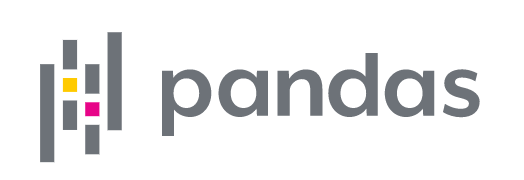

Pandas 是非常著名的开源数据处理库，其基于 NumPy 开发，该工具是 Scipy 生态中为了解决数据分析任务而设计。Pandas 纳入了大量库和一些标准的数据模型，提供了高效地操作大型数据集所需的函数和方法。

## 数据类型

Pandas 的数据类型主要有以下几种，它们分别是：Series（一维数组），DataFrame（二维数组），Panel（三维数组）



### Series

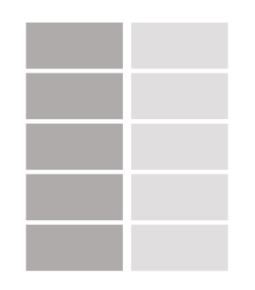

[<i class="fa fa-external-link-square" aria-hidden="true"> Series</i>](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html) 是 Pandas 中最基本的一维数组形式。其可以储存整数、浮点数、字符串等类型的数据。

Series 基本结构如下：


### `pandas.Series(data=None, index=None)`


其中，`data` 可以是字典，或者NumPy 里的 ndarray 对象等。`index` 是数据索引，索引是 Pandas 数据结构中的一大特性，它主要的功能是帮助我们更快速地定位数据。

下面，我们基于 Python 字典新建一个示例 Series。

In [8]:
import pandas as pd
s = pd.Series([3],['a'])
s

a    3
dtype: int64

由于 Pandas 基于 NumPy 开发。那么 NumPy 的数据类型 `ndarray` 多维数组自然就可以转换为 Pandas 中的数据。而 Series 则可以基于 NumPy 中的一维数据转换。

In [4]:
import pandas as pd
import numpy as np
import random
s = pd.Series(np.random.randint(5))
s

0    3
dtype: int64

### DataFrame

DataFrame 是 Pandas 中最为常见、最重要且使用频率最高的数据结构。DataFrame 和平常的电子表格或 SQL 表结构相似。


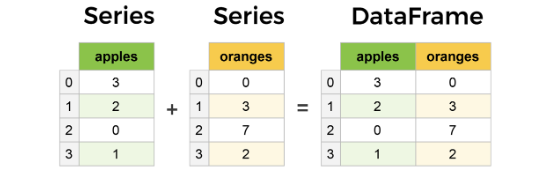

DataFrame 基本结构如下：

### `pandas.DataFrame(data=None, index=None, columns=None)`


区别于 Series，其增加了 `columns` 列索引。DataFrame 可以由以下多个类型的数据构建：

- 一维数组、列表、字典或者 Series 字典。
- 二维或者结构化的 `numpy.ndarray`。
- 一个 Series 或者另一个 DataFrame。

例如，我们首先使用一个由 Series 组成的字典来构建 DataFrame。

In [11]:
import pandas
df = pd.DataFrame({'one':[1,2,3],'two':[4,5,6]})
df

,one,two
0,1,4
1,2,5
2,3,6


当不指定索引时，DataFrame 的索引同样是从 0 开始。我们也可以直接通过一个列表构成的字典来生成 DataFrame。

In [14]:
import pandas
one = [1,2,3]
two = ['a','b','c']
df = pd.DataFrame(zip(one,two))
df

,0,1
0,1,a
1,2,b
2,3,c


或者反过来，由带字典的列表生成 DataFrame。

In [18]:
import pandas
df = pd.DataFrame([{'a':1,' b':2, 'c':3},{'a':4,' b':5, 'c':6}])
df

,a,b,c
0,1,2,3
1,4,5,6


NumPy 的多维数组非常常用，同样可以基于二维数值来构建一个 DataFrame。

In [19]:
import pandas
df = pd.DataFrame([[1,2],[3,4],[5,6]])
df

,0,1
0,1,2
1,3,4
2,5,6


### 数据读取

读取数据 CSV 文件的方法是 `pandas.read_csv()`，你可以直接传入一个相对路径，或者是网络 URL。

In [20]:
df=pd.read_csv("los_census.csv")
df

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
0,91371,1,73.5,0,1,1,1.00
1,90001,57110,26.6,28468,28642,12971,4.40
2,90002,51223,25.5,24876,26347,11731,4.36
3,90003,66266,26.3,32631,33635,15642,4.22
4,90004,62180,34.8,31302,30878,22547,2.73
...,...,...,...,...,...,...,...
314,93552,38158,28.4,18711,19447,9690,3.93
315,93553,2138,43.3,1121,1017,816,2.62
316,93560,18910,32.4,9491,9419,6469,2.92
317,93563,388,44.5,263,125,103,2.53


由于 CSV 存储时是一个二维的表格，那么 Pandas 会自动将其读取为 DataFrame 类型。

`pd.read_` 前缀开始的方法还可以读取各式各样的数据文件，且支持连接数据库。你可以阅读 [<i class="fa fa-external-link-square" aria-hidden="true"> 官方文档相应章节</i>](https://pandas.pydata.org/pandas-docs/stable/reference/io.html) 熟悉这些方法以及搞清楚这些方法包含的参数。

### 基本操作

通过上面的内容，我们已经知道一个 DataFrame 结构大致由 3 部分组成，它们分别是列名称、索引和数据。

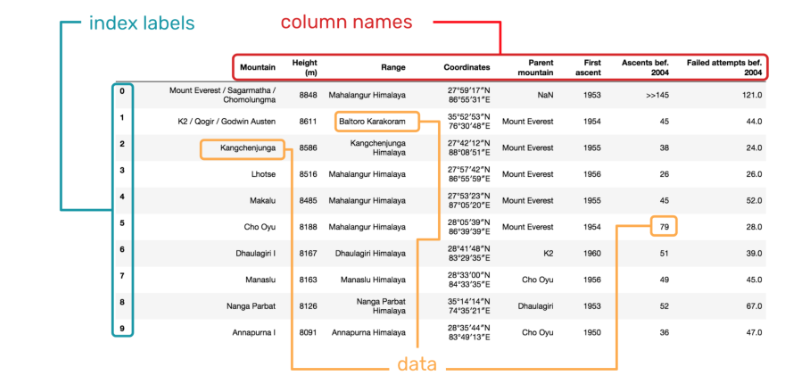

接下来，我们就学习针对 DataFrame 的基本操作。

In [21]:
df.head(15)

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
0,91371,1,73.5,0,1,1,1.00
1,90001,57110,26.6,28468,28642,12971,4.40
2,90002,51223,25.5,24876,26347,11731,4.36
3,90003,66266,26.3,32631,33635,15642,4.22
4,90004,62180,34.8,31302,30878,22547,2.73
5,90005,37681,33.9,19299,18382,15044,2.50
6,90006,59185,32.4,30254,28931,18617,3.13
7,90007,40920,24.0,20915,20005,11944,3.00
8,90008,32327,39.7,14477,17850,13841,2.33
9,90010,3800,37.8,1874,1926,2014,1.87


In [22]:
df.head(3)

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
0,91371,1,73.5,0,1,1,1.00
1,90001,57110,26.6,28468,28642,12971,4.40
2,90002,51223,25.5,24876,26347,11731,4.36


2. Pandas 还提供了统计和描述性方法，方便你从宏观的角度去了解数据集。`describe()` 相当于对数据集进行概览，会输出该数据集每一列数据的计数、最大值、最小值等。

In [23]:
df.describe()

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,91000.673981,33241.341693,36.527586,16391.564263,16849.777429,10964.570533,2.828119
std,908.360203,21644.417455,8.692999,10747.495566,10934.986468,6270.646400,0.835658
min,90001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90243.500000,19318.500000,32.400000,9763.500000,9633.500000,6765.500000,2.435000
50%,90807.000000,31481.000000,37.100000,15283.000000,16202.000000,10968.000000,2.830000
75%,91417.000000,44978.000000,41.000000,22219.500000,22690.500000,14889.500000,3.320000
max,93591.000000,105549.000000,74.000000,52794.000000,53185.000000,31087.000000,4.670000


 3.Pandas 基于 NumPy 开发，所以任何时候你都可以通过 `.values` 将 DataFrame 转换为 NumPy 数组。

In [24]:
df.values

array([[9.1371e+04, 1.0000e+00, 7.3500e+01, ..., 1.0000e+00, 1.0000e+00,
        1.0000e+00],
       [9.0001e+04, 5.7110e+04, 2.6600e+01, ..., 2.8642e+04, 1.2971e+04,
        4.4000e+00],
       [9.0002e+04, 5.1223e+04, 2.5500e+01, ..., 2.6347e+04, 1.1731e+04,
        4.3600e+00],
       ...,
       [9.3560e+04, 1.8910e+04, 3.2400e+01, ..., 9.4190e+03, 6.4690e+03,
        2.9200e+00],
       [9.3563e+04, 3.8800e+02, 4.4500e+01, ..., 1.2500e+02, 1.0300e+02,
        2.5300e+00],
       [9.3591e+04, 7.2850e+03, 3.0900e+01, ..., 3.6320e+03, 1.9820e+03,
        3.6700e+00]])

除了 `.values`，DataFrame 支持的常见属性可以通过 [<i class="fa fa-external-link-square" aria-hidden="true"> 官方文档相应章节</i>](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#attributes-and-underlying-data) 查看。其中常用的有：

In [28]:
print(pd.isnull(df))
pd.notnull(df)

     Zip Code  Total Population  Median Age  Total Males  Total Females  \
0       False             False       False        False          False   
1       False             False       False        False          False   
2       False             False       False        False          False   
3       False             False       False        False          False   
4       False             False       False        False          False   
..        ...               ...         ...          ...            ...   
314     False             False       False        False          False   
315     False             False       False        False          False   
316     False             False       False        False          False   
317     False             False       False        False          False   
318     False             False       False        False          False   

     Total Households  Average Household Size  
0               False                   False  
1  

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
0,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...
314,True,True,True,True,True,True,True
315,True,True,True,True,True,True,True
316,True,True,True,True,True,True,True
317,True,True,True,True,True,True,True


In [44]:
print(df.index)

print(df.columns)


RangeIndex(start=0, stop=319, step=1)
Index(['Zip Code', 'Total Population', 'Median Age', 'Total Males',
       'Total Females', 'Total Households', 'Average Household Size'],
      dtype='object')


In [48]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,309,310,311,312,313,314,315,316,317,318
Zip Code,91371.0,90001.0,90002.00,90003.00,90004.00,90005.0,90006.00,90007.0,90008.00,90010.00,...,93536.00,93543.00,93544.0,93550.00,93551.00,93552.00,93553.00,93560.00,93563.00,93591.00
Total Population,1.0,57110.0,51223.00,66266.00,62180.00,37681.0,59185.00,40920.0,32327.00,3800.00,...,70918.00,13033.00,1259.0,74929.00,50798.00,38158.00,2138.00,18910.00,388.00,7285.00
Median Age,73.5,26.6,25.50,26.30,34.80,33.9,32.40,24.0,39.70,37.80,...,34.40,32.90,52.4,27.50,37.00,28.40,43.30,32.40,44.50,30.90
Total Males,0.0,28468.0,24876.00,32631.00,31302.00,19299.0,30254.00,20915.0,14477.00,1874.00,...,37804.00,6695.00,689.0,36414.00,25056.00,18711.00,1121.00,9491.00,263.00,3653.00
Total Females,1.0,28642.0,26347.00,33635.00,30878.00,18382.0,28931.00,20005.0,17850.00,1926.00,...,33114.00,6338.00,570.0,38515.00,25742.00,19447.00,1017.00,9419.00,125.00,3632.00
Total Households,1.0,12971.0,11731.00,15642.00,22547.00,15044.0,18617.00,11944.0,13841.00,2014.00,...,20964.00,3560.00,569.0,20864.00,15963.00,9690.00,816.00,6469.00,103.00,1982.00
Average Household Size,1.0,4.4,4.36,4.22,2.73,2.5,3.13,3.0,2.33,1.87,...,3.07,3.66,2.2,3.58,3.18,3.93,2.62,2.92,2.53,3.67


### 数据选择

在数据预处理过程中，我们往往会对数据集进行**切分**，只将需要的某些行、列，或者数据块保留下来，输出到下一个流程中去。这也就是所谓的数据选择，或者数据索引。

由于 Pandas 的数据结构中存在索引、标签，所以我们可以通过多轴索引完成对数据的选择。

#### 基于索引数字选择

所以，我们首先可以基于数字索引对数据集进行选择。这里用到的 Pandas 中的 [`.iloc`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html#pandas.DataFrame.iloc) 方法。该方法可以接受的类型有：

1.  整数。例如：`5`
2.  整数构成的列表或数组。例如：`[1, 2, 3]`
3.  布尔数组。
4.  可返回索引值的函数或参数。

下面，我们使用上方的示例数据进行演示。

首先，我们可以选择前 3 行数据。这和 Python 或者 NumPy 里面的切片很相似。

In [59]:
print(df.loc[3])
print(df['Zip Code'])

Zip Code                  90003.00
Total Population          66266.00
Median Age                   26.30
Total Males               32631.00
Total Females             33635.00
Total Households          15642.00
Average Household Size        4.22
Name: 3, dtype: float64
0      91371
1      90001
2      90002
3      90003
4      90004
       ...  
314    93552
315    93553
316    93560
317    93563
318    93591
Name: Zip Code, Length: 319, dtype: int64


In [71]:
print(df.loc[[1, 3]])
print(df.loc[0: 3])
print(df.iloc[0: 3,0: 2])

   Zip Code  Total Population  Median Age  Total Males  Total Females  \
1     90001             57110        26.6        28468          28642   
3     90003             66266        26.3        32631          33635   

   Total Households  Average Household Size  
1             12971                    4.40  
3             15642                    4.22  
   Zip Code  Total Population  Median Age  Total Males  Total Females  \
0     91371                 1        73.5            0              1   
1     90001             57110        26.6        28468          28642   
2     90002             51223        25.5        24876          26347   
3     90003             66266        26.3        32631          33635   

   Total Households  Average Household Size  
0                 1                    1.00  
1             12971                    4.40  
2             11731                    4.36  
3             15642                    4.22  
   Zip Code  Total Population
0     91371     

那么选择多行，是不是 `df.iloc[1, 3, 5]` 这样呢？

答案是错误的。`df.iloc[]` 的 `[[行]，[列]]` 里面可以同时接受行和列的位置，如果你直接键入 `df.iloc[1, 3, 5]` 就会报错。

所以，很简单。如果你想要选择 1，3，5 行，可以这样做。

In [72]:
df.iloc[[1, 3, 5]]

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
1,90001,57110,26.6,28468,28642,12971,4.40
3,90003,66266,26.3,32631,33635,15642,4.22
5,90005,37681,33.9,19299,18382,15044,2.50


选择行学会以后，选择列就应该能想到怎么办了。例如，我们要选择第 2-4 列。

In [92]:
df.iloc[0:-1,2:5]

,Median Age,Total Males,Total Females
0,73.5,0,1
1,26.6,28468,28642
2,25.5,24876,26347
3,26.3,32631,33635
4,34.8,31302,30878
...,...,...,...
313,37.0,25056,25742
314,28.4,18711,19447
315,43.3,1121,1017
316,32.4,9491,9419


这里选择 2-4 列，输入的却是 `1:4`。这和 Python 或者 NumPy 里面的切片操作非常相似。既然我们能定位行和列，那么只需要组合起来，我们就可以选择数据集中的任何数据了。

#### 基于标签名称选择

除了根据数字索引选择，还可以直接根据标签对应的名称选择。这里用到的方法和上面的 `iloc` 很相似，少了个 `i` 为 [`df.loc[]`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html#pandas.DataFrame.loc)。

`df.loc[]` 可以接受的类型有：

1.  单个标签。例如：`2` 或 `'a'`，这里的 `2` 指的是标签而不是索引位置。
2.  列表或数组包含的标签。例如：`['A', 'B', 'C']`。
3.  切片对象。例如：`'A':'E'`，注意这里和上面切片的不同支持，首尾都包含在内。
4.  布尔数组。
5.  可返回标签的函数或参数。

下面，我们来演示 `df.loc[]` 的用法。先选择前 3 行：

In [108]:
df.loc[0:2]

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
0,91371,1,73.5,0,1,1,1.00
1,90001,57110,26.6,28468,28642,12971,4.40
2,90002,51223,25.5,24876,26347,11731,4.36


再选择 1，3，5 行：

In [95]:
df.loc[[1,3,5]]

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
1,90001,57110,26.6,28468,28642,12971,4.40
3,90003,66266,26.3,32631,33635,15642,4.22
5,90005,37681,33.9,19299,18382,15044,2.50


然后，选择 2-4 列：

In [113]:
df.loc[:,'Total Population':'Total Females']

,Total Population,Median Age,Total Males,Total Females
0,1,73.5,0,1
1,57110,26.6,28468,28642
2,51223,25.5,24876,26347
3,66266,26.3,32631,33635
4,62180,34.8,31302,30878
...,...,...,...,...
314,38158,28.4,18711,19447
315,2138,43.3,1121,1017
316,18910,32.4,9491,9419
317,388,44.5,263,125


最后，选择 1，3 行和 Median Age 后面的列：

In [114]:
df.loc[[1,3],'Median Age':]

,Median Age,Total Males,Total Females,Total Households,Average Household Size
1,26.6,28468,28642,12971,4.40
3,26.3,32631,33635,15642,4.22


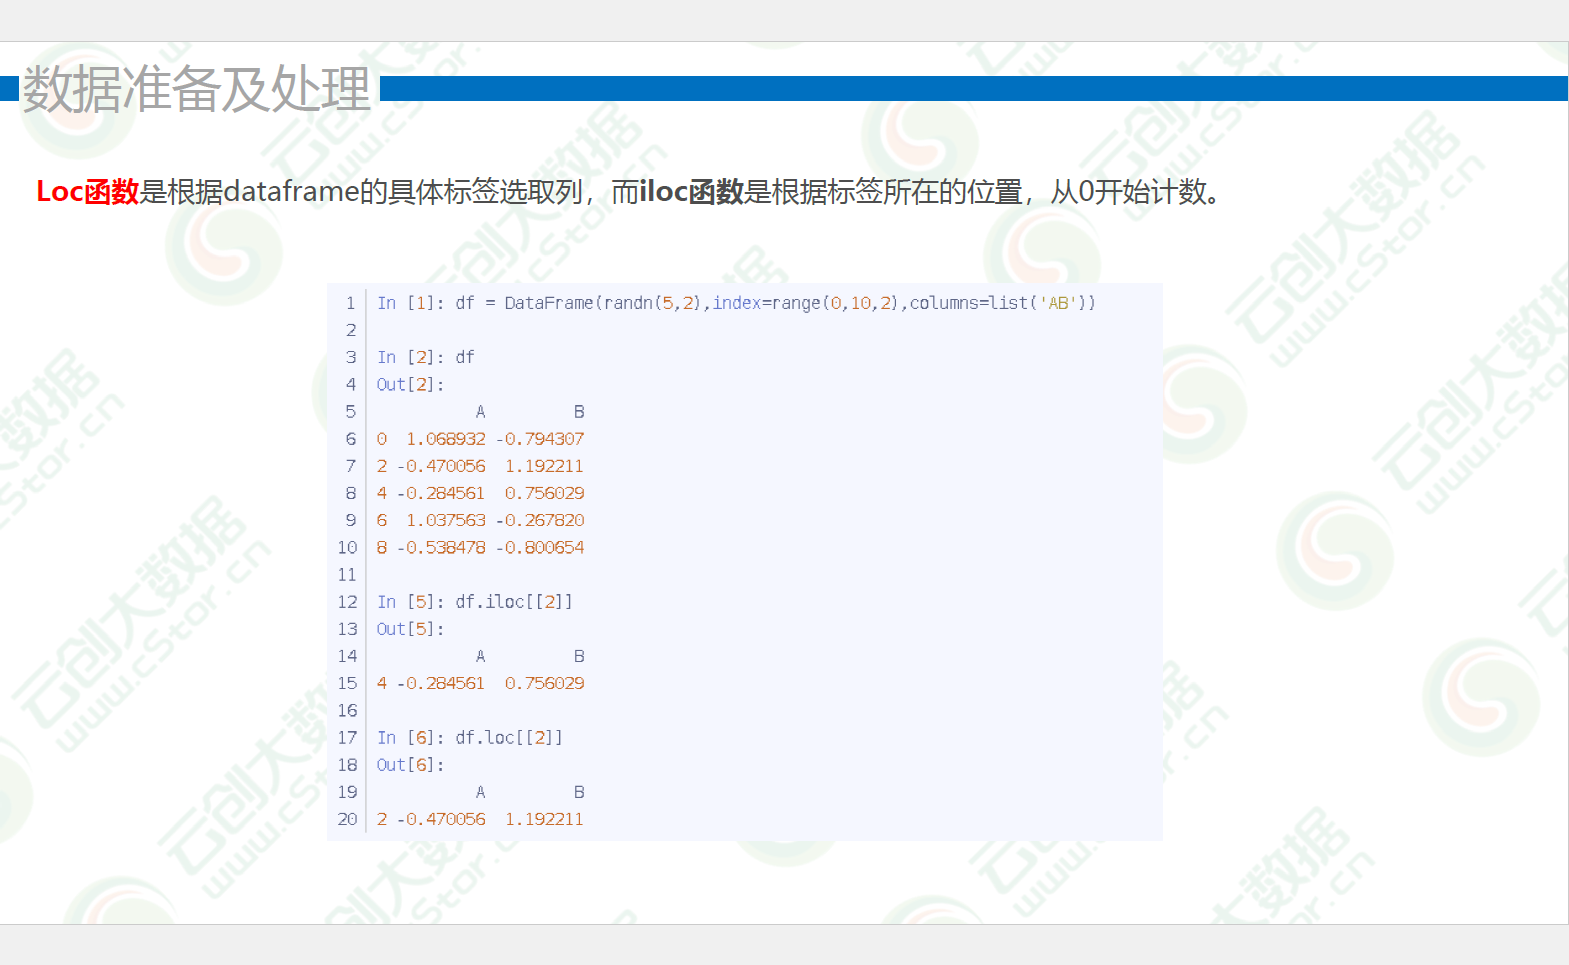

### 数据删减

[`DataFrame.drop`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html#pandas.DataFrame.drop) 可以直接去掉数据集中指定的列和行。一般在使用时，我们指定 `labels` 标签参数，然后再通过 `axis` 指定按列或按行删除即可。

In [115]:
df.drop(labels='Total Males',axis=1)

,Zip Code,Total Population,Median Age,Total Females,Total Households,Average Household Size
0,91371,1,73.5,1,1,1.00
1,90001,57110,26.6,28642,12971,4.40
2,90002,51223,25.5,26347,11731,4.36
3,90003,66266,26.3,33635,15642,4.22
4,90004,62180,34.8,30878,22547,2.73
...,...,...,...,...,...,...
314,93552,38158,28.4,19447,9690,3.93
315,93553,2138,43.3,1017,816,2.62
316,93560,18910,32.4,9419,6469,2.92
317,93563,388,44.5,125,103,2.53


[`DataFrame.drop_duplicates`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html#pandas.DataFrame.drop_duplicates) 则通常用于数据去重，即剔除数据集中的重复值。使用方法非常简单，指定去除重复值规则，以及 `axis` 按列还是按行去除即可。

In [117]:
df.drop_duplicates(subset='Average Household Size',keep='first',inplace=False)

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
0,91371,1,73.5,0,1,1,1.00
1,90001,57110,26.6,28468,28642,12971,4.40
2,90002,51223,25.5,24876,26347,11731,4.36
3,90003,66266,26.3,32631,33635,15642,4.22
4,90004,62180,34.8,31302,30878,22547,2.73
...,...,...,...,...,...,...,...
289,91792,30854,35.3,14950,15904,9154,3.35
298,92833,51767,36.0,25643,26124,15849,3.23
299,93040,2031,29.3,1052,979,522,3.89
313,93551,50798,37.0,25056,25742,15963,3.18


除此之外，另一个用于数据删减的方法 [`DataFrame.dropna`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html#pandas.DataFrame.dropna) 也十分常用，其主要的用途是删除缺少值，即数据集中空缺的数据列或行。

In [118]:
df.dropna(axis=0, how='any')

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
0,91371,1,73.5,0,1,1,1.00
1,90001,57110,26.6,28468,28642,12971,4.40
2,90002,51223,25.5,24876,26347,11731,4.36
3,90003,66266,26.3,32631,33635,15642,4.22
4,90004,62180,34.8,31302,30878,22547,2.73
...,...,...,...,...,...,...,...
314,93552,38158,28.4,18711,19447,9690,3.93
315,93553,2138,43.3,1121,1017,816,2.62
316,93560,18910,32.4,9491,9419,6469,2.92
317,93563,388,44.5,263,125,103,2.53


### 数据填充

既然提到了数据删减，反之则可能会遇到数据填充的情况。而对于一个给定的数据集而言，我们一般不会乱填数据，而更多的是对缺失值进行填充。

#### 检测缺失值

Pandas 为了更方便地检测缺失值，将不同类型数据的缺失均采用 `NaN` 标记。这里的 NaN 代表 Not a Number，它仅仅是作为一个标记。例外是，在时间序列里，时间戳的丢失采用 `NaT` 标记。

Pandas 中用于检测缺失值主要用到两个方法，分别是：[`isna()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html#pandas.DataFrame.isna) 和 [`notna()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.notna.html#pandas.DataFrame.notna)，故名思意就是「是缺失值」和「不是缺失值」。默认会返回布尔值用于判断。

接下来，我们人为生成一组包含缺失值的示例数据。

In [149]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'a':[1,np.nan,3],'b':[4,np.nan,6]})
df

,a,b
0,1.0,4.0
1,NaN,NaN
2,3.0,6.0


然后，通过 [`isna()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html#pandas.DataFrame.isna) 或 [`notna()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.notna.html#pandas.DataFrame.notna) 中的一个即可确定数据集中的缺失值。

In [151]:
df.isna()

,a,b
0,False,False
1,True,True
2,False,False


In [152]:
df.notna()

,a,b
0,True,True
1,False,False
2,True,True


上面已经对缺省值的产生、检测进行了介绍。实际上，面对缺失值一般就是填充和剔除两项操作。填充和清除都是两个极端。如果你感觉有必要保留缺失值所在的列或行，那么就需要对缺失值进行填充。如果没有必要保留，就可以选择清除缺失值。

其中，缺失值剔除的方法 `dropna()` 已经在上面介绍过了。下面来看一看填充缺失值 `fillna()` 方法。

首先，我们可以用相同的标量值替换 `NaN`，比如用 `0`。

In [156]:
df.fillna(0)

,a,b
0,1.0,4.0
1,0.0,0.0
2,3.0,6.0


除了直接填充值，我们还可以通过参数，将缺失值前面或者后面的值填充给相应的缺失值。例如使用缺失值前面的值进行填充：

In [160]:
df.fillna(method='ffill')

,a,b
0,1.0,4.0
1,1.0,4.0
2,3.0,6.0


或者是后面的值：

In [161]:
df.fillna(method='bfill')

,a,b
0,1.0,4.0
1,3.0,6.0
2,3.0,6.0


最后一行由于没有对于的后序值，自然继续存在缺失值。

上面的例子中，我们的缺失值是间隔存在的。那么，如果存在连续的缺失值是怎样的情况呢？试一试。首先，我们将数据集的第 2，4 ，6 列的第 3，5 行也置为缺失值。

In [165]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'a':[1,np.nan,np.nan,3],'b':[4,np.nan,np.nan,6]},)
df

,a,b
0,1.0,4.0
1,NaN,NaN
2,NaN,NaN
3,3.0,6.0


然后来正向填充：

In [166]:
df.fillna(method='bfill')

,a,b
0,1.0,4.0
1,3.0,6.0
2,3.0,6.0
3,3.0,6.0


可以看到，连续缺失值也是按照前序数值进行填充的，并且完全填充。这里，我们可以通过 limit= 参数设置连续填充的限制数量。

In [167]:
df.fillna(method='bfill', limit=1)

,a,b
0,1.0,4.0
1,NaN,NaN
2,3.0,6.0
3,3.0,6.0


除了上面的填充方式，还可以通过 Pandas 自带的求平均值方法等来填充特定列或行。举个例子：

In [172]:
df.fillna(df.mean())

,a,b
0,1.0,4.0
1,2.0,5.0
2,2.0,5.0
3,3.0,6.0


对 C 列到 E 列用平均值填充。

#### 插值填充

我们可以通过 [`interpolate()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html#pandas.DataFrame.interpolate) 方法完成线性插值。当然，其他一些插值算法可以阅读官方文档了解。

In [173]:
df.interpolate() 

,a,b
0,1.000000,4.000000
1,1.666667,4.666667
2,2.333333,5.333333
3,3.000000,6.000000


对于上面存在的缺失值，如果通过前后值，或者平均值来填充是不太能反映出趋势的。这时候，插值最好使。我们用默认的线性插值试一试。

下图展示了插值后的数据，明显看出插值结果符合数据的变化趋势。如果按照前后数据顺序填充，则无法做到这一点。

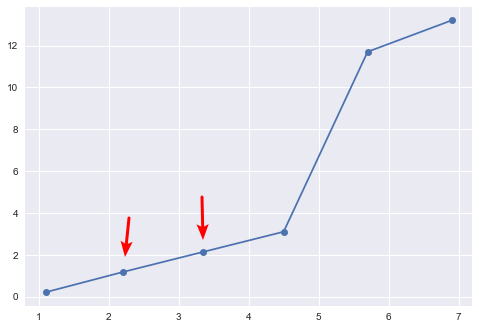